# 1 Ensemble Learning

This task will be some hands-on programming of two different ensemble learning techniques, i.e. bagging and boosting. More specifically, we will use the [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) as well as [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) provided by the scikit-learn library.

As you are already familiar with loading datasets, splitting into training and test data, fitting a classifier etc., we will this time just give you hints about what steps to do. Also, we will give you some libraries to import, so that you have a good impression already about what you might need for this task. You can use additional imports of course, but please stick with the libraries we have used in this course so far!

In [23]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt


# Additional imports here, if needed

np.random.seed(42)

## 1.1 Load and Split **Digits** Dataset

### Task 1.1.1 Load dataset 

Load the [Digits Toy Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) provided by Scikit-Learn and save it in the variable given below. Make sure that **all 10 digits** are included in the dataset.

In [3]:
digits = datasets.load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Task 1.1.2 Save feature and target data

Save the feature data from the dataset (i.e. the vectors representing the digits) and the respective target labels in two different variables *X* and *y*.

In [5]:
X = digits.data
y = digits.target

### Task 1.1.3 Split train and test data

Split all data into train and test set, denoting your training set *(X_train, y_train)* and your test set *(X_test, y_test)*. We want to have 70% of the samples for training and 30% of the samples for testing.

In [13]:
training_size = int(len(X) / 100 * 70)
test_size = len(X) - training_size
x_train = X[0:training_size]
x_test = X[0:test_size]

y_train = y[0:training_size]
y_test = y[0:test_size]

## Task 1.2 Bagging Classifier

### Task 1.2.1 Train Classifier

Create a **Bagging Classifier** object and train it on the given training data you got from task 1.1.3. You can play with different sets of parameters for the classifier (such as number of estimators etc.), but please keep the original base estimator (i.e. decision tree).

In [18]:
bc = BaggingClassifier()
bc_model = bc.fit(x_train,y_train)

### Task 1.2.2 Evaluate Classifier

Now it's time to see how the classifier performs. Make the prediction of target labels *y_pred* based on the test samples and print the accuracy of the model.

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8
 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0
 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2
 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7
 6 8 4 3 1 4 0 5 3 6 9 6 

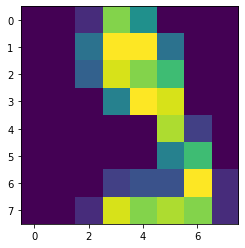

In [28]:
y_pred = bc_model.predict(x_test)

# print(y_pred)
# print(y_test)



# plt.imshow(x_test[31].reshape(8, 8))

bc_accuracy = bc_model.score(x_test, y_test)

print("Accuracy of Bagging Classifier on Digits Dataset: %.4f" % bc_accuracy)

Great, you're done! Now it's time to do the same few steps using the AdaBoost classifier.

## Task 1.3 AdaBoost Classifier

### Task 1.3.1 Train Classifier

Create an **AdaBoost Classifier** object and train it on the given training data you got from task 1.1.3. You can play with different sets of parameters for the classifier (such as number of estimators, learning rate etc.), but please keep the original base estimator (i.e. decision tree).

In [36]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)

abc_model = abc.fit(x_train, y_train, )

### Task 1.3.2 Evaluate Classifier

Once again it's time to see how the classifier performs. Make the prediction of target labels *y_pred* based on the test samples and print the accuracy of the model.

In [38]:
y_pred = abc_model.predict(x_test)

abc_accuracy = abc_model.score(x_test, y_test)

print(y_pred)
print(y_test)



# plt.imshow(x_test[31].reshape(8, 8))

print("Accuracy of AdaBoost Classifier on Digits Dataset: %.4f" % abc_accuracy)

[0 1 1 1 0 1 6 1 1 1 0 1 1 1 1 1 1 1 1 9 0 1 1 1 6 6 1 1 1 1 0 9 1 1 1 1 0
 1 9 9 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 6 1 1 1 1 1 6 6 6 6 1 1 1 1 9 9
 1 1 1 1 0 0 1 1 6 1 1 1 6 1 6 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 6 9 9 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 9 1 1 0 1 1 1 1 6 6 1 1 9 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 6 1 1 9 0 1 1 6 6 6 0 1 1 9 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 9 1 1 6 1 1 1 1 1 1 1 6 6 1 1 1 1 0 1 0 1 1 1 0 9 1 1 6 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 6 1 1 1 1 1 1 6 1 1 1 1 1 1 1 6 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 9 6 1 1 1 0 1 1 1 1 1 6 1 1 1 0 1 1 1 1 1 6 1 1 1 0 9 1 1 6 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 6 6 6 6 1 1 1 0 1 1 1 1
 1 0 0 1 1 6 1 1 1 1 1 6 1 1 1 1 1 1 1 1 6 1 1 1 0 1 1 6 1 6 1 1 1 6 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 9 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 6 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 9 1 1 1 1 1 

_________________________

You're done! Are the accuracy results as you had expected? If not, feel free to adjust some parameters to maximize your outcome. Either way, you might have just written your very first ensemble classifiers in python!